In [22]:
import pandas as pd
import numpy as np
import datetime as dt
import dateutil as du
import statsmodels.formula.api as sm
import sklearn as sk
import sklearn.ensemble as ske
from sklearn.decomposition import PCA
import scipy as sp
import pickle as pc
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [23]:
#Best fit function
def linear_func(x, A, b):
    return A * x + b

In [24]:
# Show plots of interesting correlations
def plot_patients(patients):
    fig = plt.figure(figsize=(20,20))
    params, params_covariance = sp.optimize.curve_fit(linear_func, patients.HR.astype('float').values, patients.FiO2.astype('float').values,p0=[2, 2])
    plt.scatter(patients.HR,patients.FiO2,color='black')
    plt.plot(patients.HR,linear_func(patients.HR.astype('float').values,params[0],params[1]),color='red')
    plt.xlabel('HR',size=30)
    plt.ylabel('FiO2',size=30)
    corr, p_value = sp.stats.pearsonr(patients.HR,patients.FiO2)
    plt.title('Pearson R correlation Coeff: ' + str(round(corr,3)) + ';    p-value: ' + str(round(p_value,3)) + ';    Statistically Signficant: ' + str('Yes' if p_value<0.05 else 'No'), size=20 )
    
    fig = plt.figure(figsize=(20,20))
    params, params_covariance = sp.optimize.curve_fit(linear_func, patients.HCT.astype('float').values, patients.FiO2.astype('float').values,p0=[2, 2])
    plt.scatter(patients.HCT,patients.FiO2,color='black')
    plt.plot(patients.HCT,linear_func(patients.HCT.astype('float').values,params[0],params[1]),color='red')
    plt.xlabel('HCT',size=30)
    plt.ylabel('FiO2',size=30)
    corr, p_value = sp.stats.pearsonr(patients.HCT,patients.FiO2)
    plt.title('Pearson R correlation Coeff: ' + str(round(corr,3)) + ';    p-value: ' + str(round(p_value,3)) + ';    Statistically Signficant: ' + str('Yes' if p_value<0.05 else 'No'), size=20 )
    
    fig = plt.figure(figsize=(20,20))
    params, params_covariance = sp.optimize.curve_fit(linear_func, patients.Temp.astype('float').values, patients.WBC.astype('float').values,p0=[2, 2])
    plt.scatter(patients.Temp,patients.WBC,color='black')
    plt.plot(patients.Temp,linear_func(patients.Temp.astype('float').values,params[0],params[1]),color='red')
    plt.xlabel('Temp',size=30)
    plt.ylabel('WBC',size=30)
    corr, p_value = sp.stats.pearsonr(patients.Temp,patients.WBC)
    plt.title('Pearson R correlation Coeff: ' + str(round(corr,3)) + ';    p-value: ' + str(round(p_value,3)) + ';    Statistically Signficant: ' + str('Yes' if p_value<0.05 else 'No'), size=20 )
    
    fig = plt.figure(figsize=(20,20))
    params, params_covariance = sp.optimize.curve_fit(linear_func, patients.WBC.astype('float').values, patients.Age.astype('float').values,p0=[2, 2])
    plt.scatter(patients.WBC,patients.Age,color='black')
    plt.plot(patients.WBC,linear_func(patients.WBC.astype('float').values,params[0],params[1]),color='red')
    plt.xlabel('WBC',size=30)
    plt.ylabel('Age',size=30)
    corr, p_value = sp.stats.pearsonr(patients.WBC,patients.Age)
    plt.title('Pearson R correlation Coeff: ' + str(round(corr,3)) + ';    p-value: ' + str(round(p_value,3)) + ';    Statistically Signficant: ' + str('Yes' if p_value<0.05 else 'No'), size=20 )
    
    return True

In [25]:
#Removes outliers using Winsorize technique in 'HCT','FiO2','Glucose','Temp', and 'WBC', then plots
def remove_Outliers(patients):
    patients.HCT = pd.Series(sp.stats.mstats.winsorize(patients.HCT,limits=[0.02,0.02],inplace=False))
    patients.Glucose = pd.Series(sp.stats.mstats.winsorize(patients.Glucose,limits=[0.02,0.02],inplace=False))
    patients.FiO2 = pd.Series(sp.stats.mstats.winsorize(patients.FiO2,limits=[0.02,0.02],inplace=False))
    patients.Temp = pd.Series(sp.stats.mstats.winsorize(patients.WBC,limits=[0.02,0.02],inplace=False))
    patients.WBC = pd.Series(sp.stats.mstats.winsorize(patients.HCT,limits=[0.02,0.02],inplace=False))
    return patients

In [26]:
#Get paitents with selected columns
num_patients = 500 # Number of patients
columns = ['HR','HCT','FiO2','Glucose','Temp','WBC','GCS','Urine','Age','Gender','Length_of_stay','DeathStatus'] #Select the columns of interest
patients = pd.DataFrame(index=np.arange(num_patients),columns=columns)
outcome = pd.read_csv("Outcomes-a.txt",sep=',')
i=0
print(len(outcome))
for j in np.arange(len(outcome)):
    if(i<num_patients):
        patient = pd.read_csv("set-a/"+str(outcome.RecordID[j]) + ".txt",sep=',')
        skip=False
        for k in np.arange(len(columns)):
#            Skip patient if not all the selected columns have values
            if(k < 9) and (not columns[k] in np.unique(patient.Parameter).tolist()):
#                print('Missing: ' + columns[k])
                skip=True
        if(not skip):
#            Populate the selected columns for this patient
            patients.iloc[i].HR = patient[patient.Parameter =='HR'].iloc[-1].Value
            patients.iloc[i].HCT = patient[patient.Parameter =='HCT'].iloc[-1].Value
            patients.iloc[i].Glucose = patient[patient.Parameter =='Glucose'].iloc[-1].Value
            patients.iloc[i].FiO2 = patient[patient.Parameter =='FiO2'].iloc[-1].Value
            patients.iloc[i].Temp = patient[patient.Parameter =='Temp'].iloc[-1].Value
            patients.iloc[i].WBC = patient[patient.Parameter =='WBC'].iloc[-1].Value
            patients.iloc[i].GCS = patient[patient.Parameter =='GCS'].iloc[-1].Value
            patients.iloc[i].Urine = patient[patient.Parameter =='Urine'].iloc[-1].Value
            patients.iloc[i].Age = patient[patient.Parameter =='Age'].iloc[0].Value
            patients.iloc[i].Gender = patient[patient.Parameter =='Gender'].iloc[0].Value
            patients.iloc[i].Length_of_stay = outcome[outcome.RecordID ==outcome.RecordID[j]].Length_of_stay.values[0]
            patients.iloc[i].DeathStatus = outcome[outcome.RecordID ==outcome.RecordID[j]]['In-hospital_death'].values[0]
            i = i+1
            


4000


In [27]:
#Add patient number
patients.insert(loc=0,column='patient_num',value=pd.Series(np.arange(num_patients)))
# Now we have num_paitents unique patients with 'HR','HCT','FiO2','Glucose','Temp','WBC','GCS','Age','Gender','Length_of_stay', and 'DeathStatus'

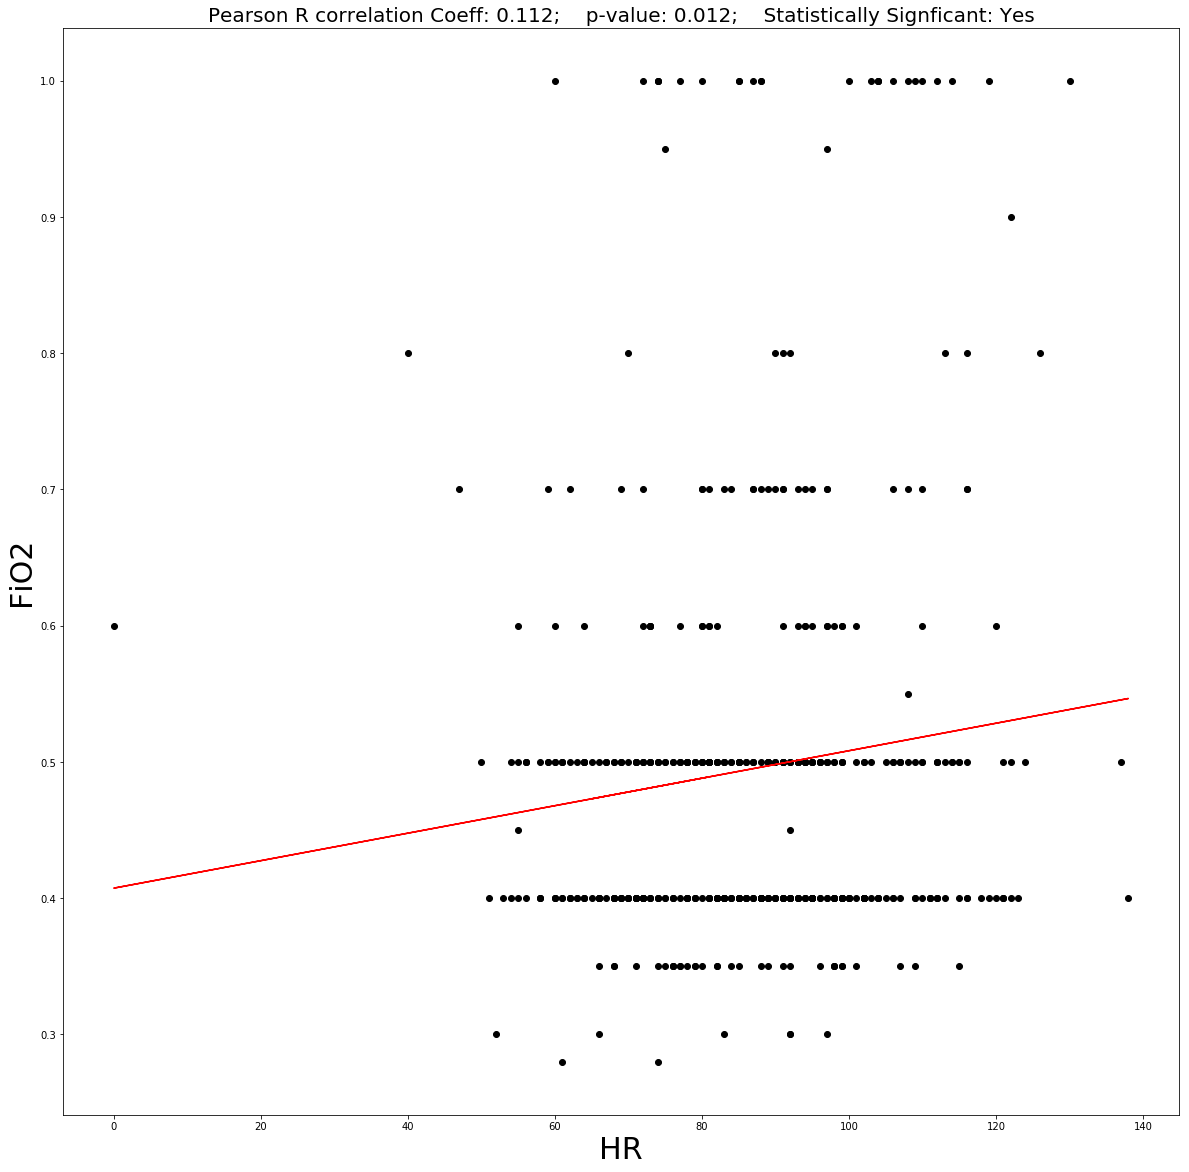

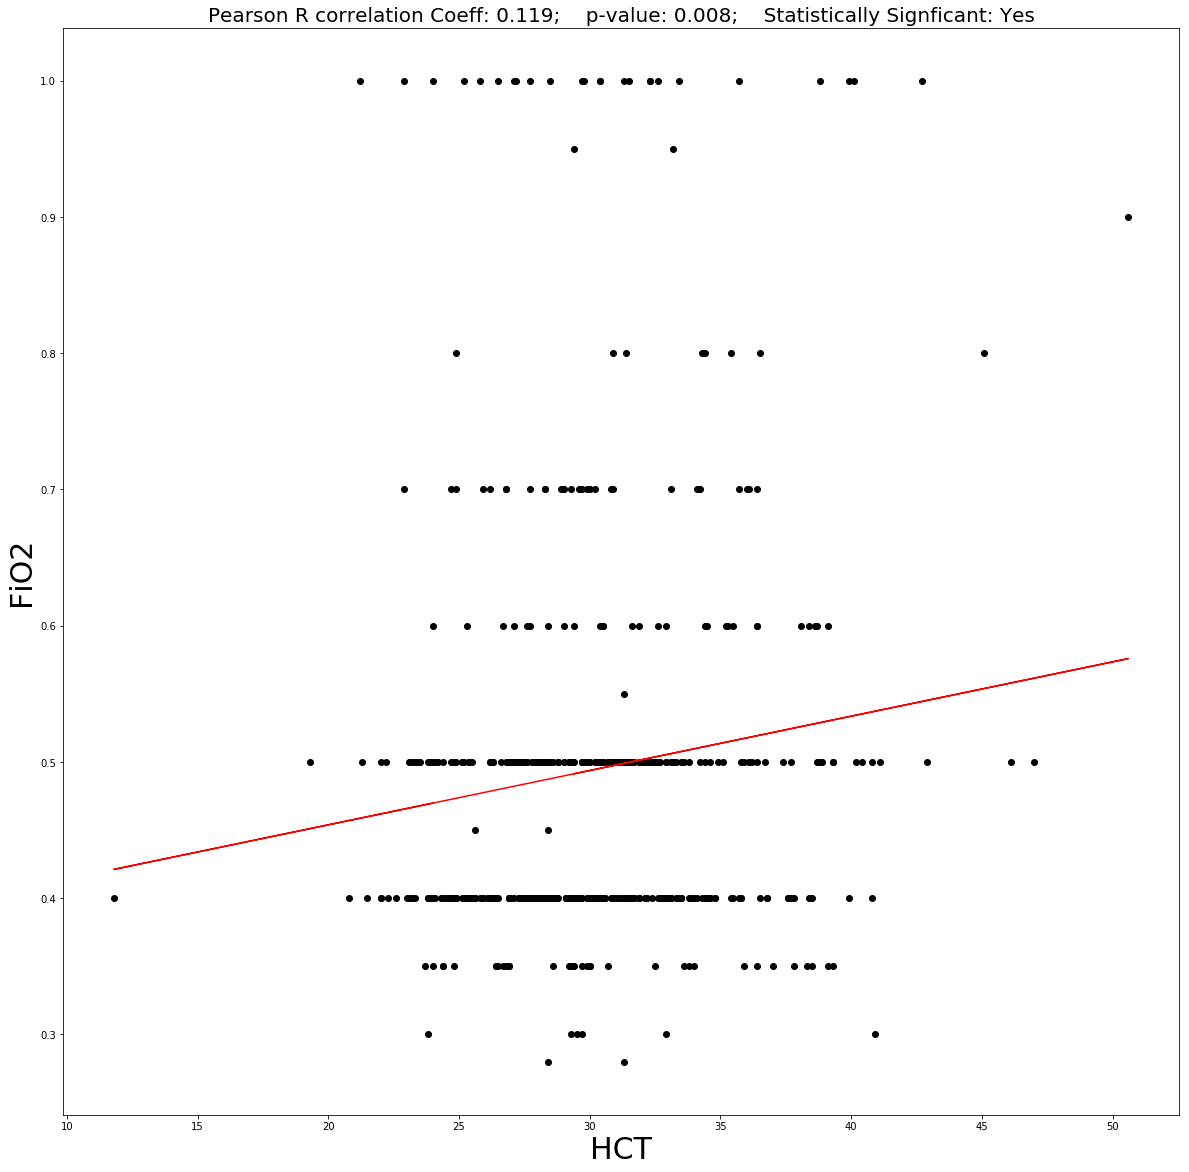

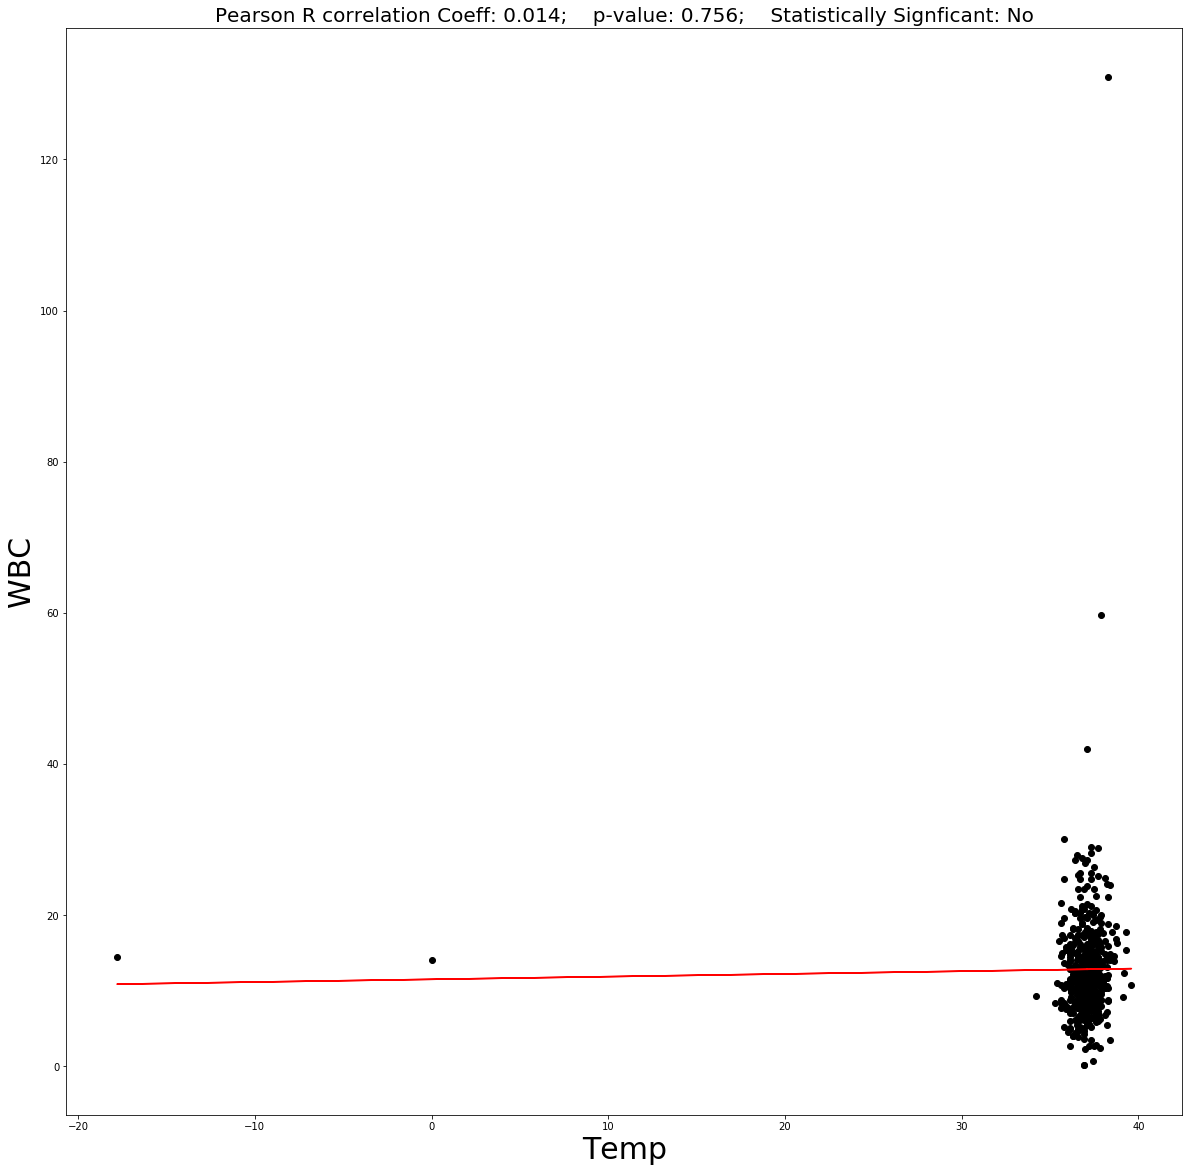

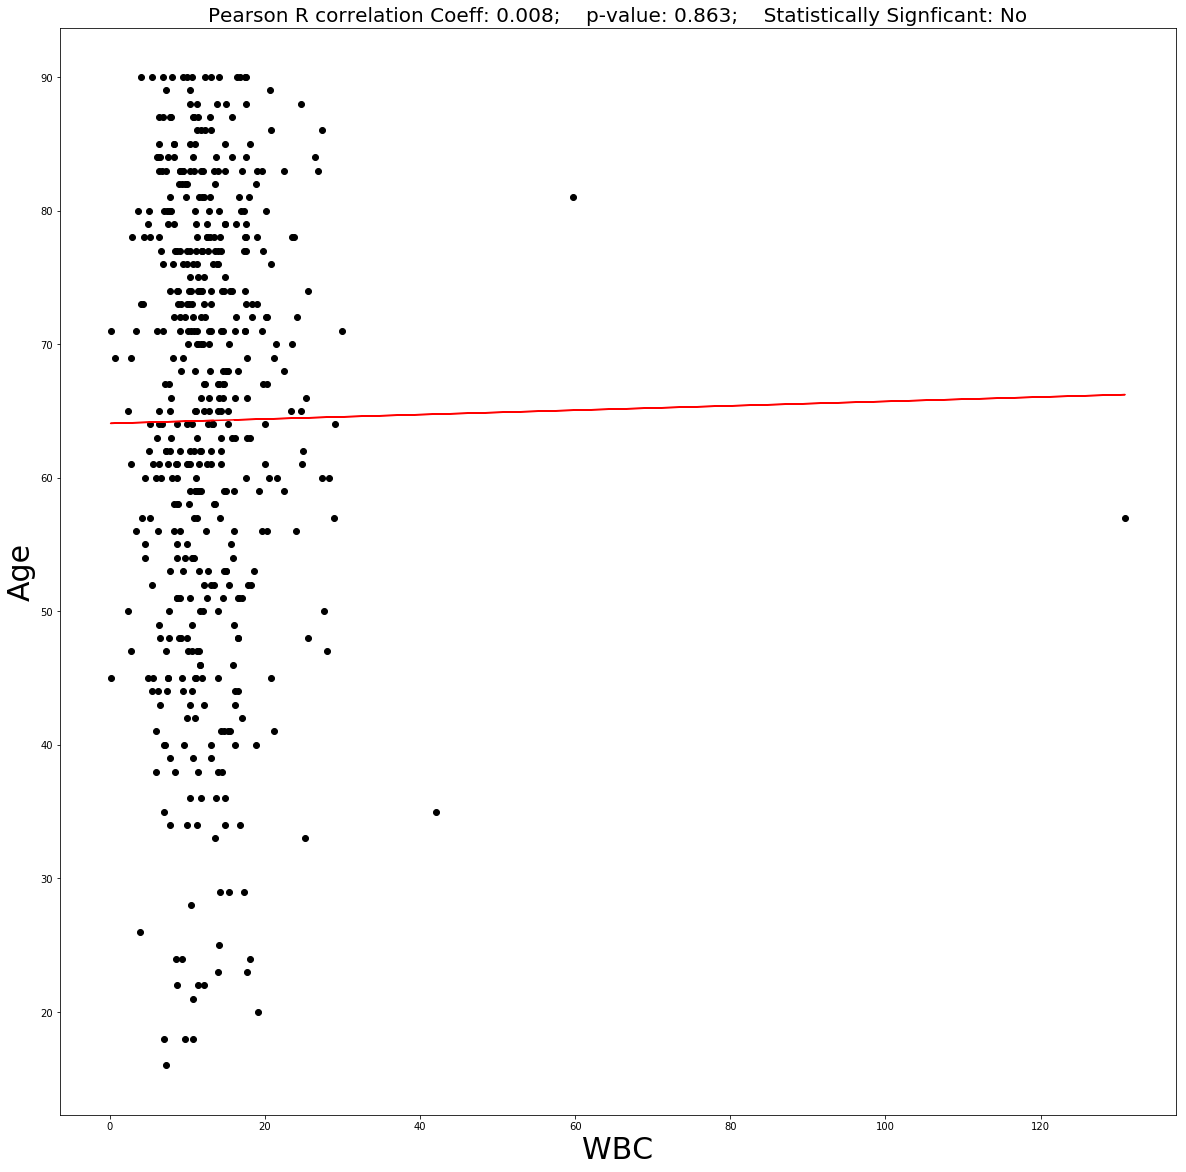

In [28]:
#Raw data plots
plot_patients(patients)
plt.show()

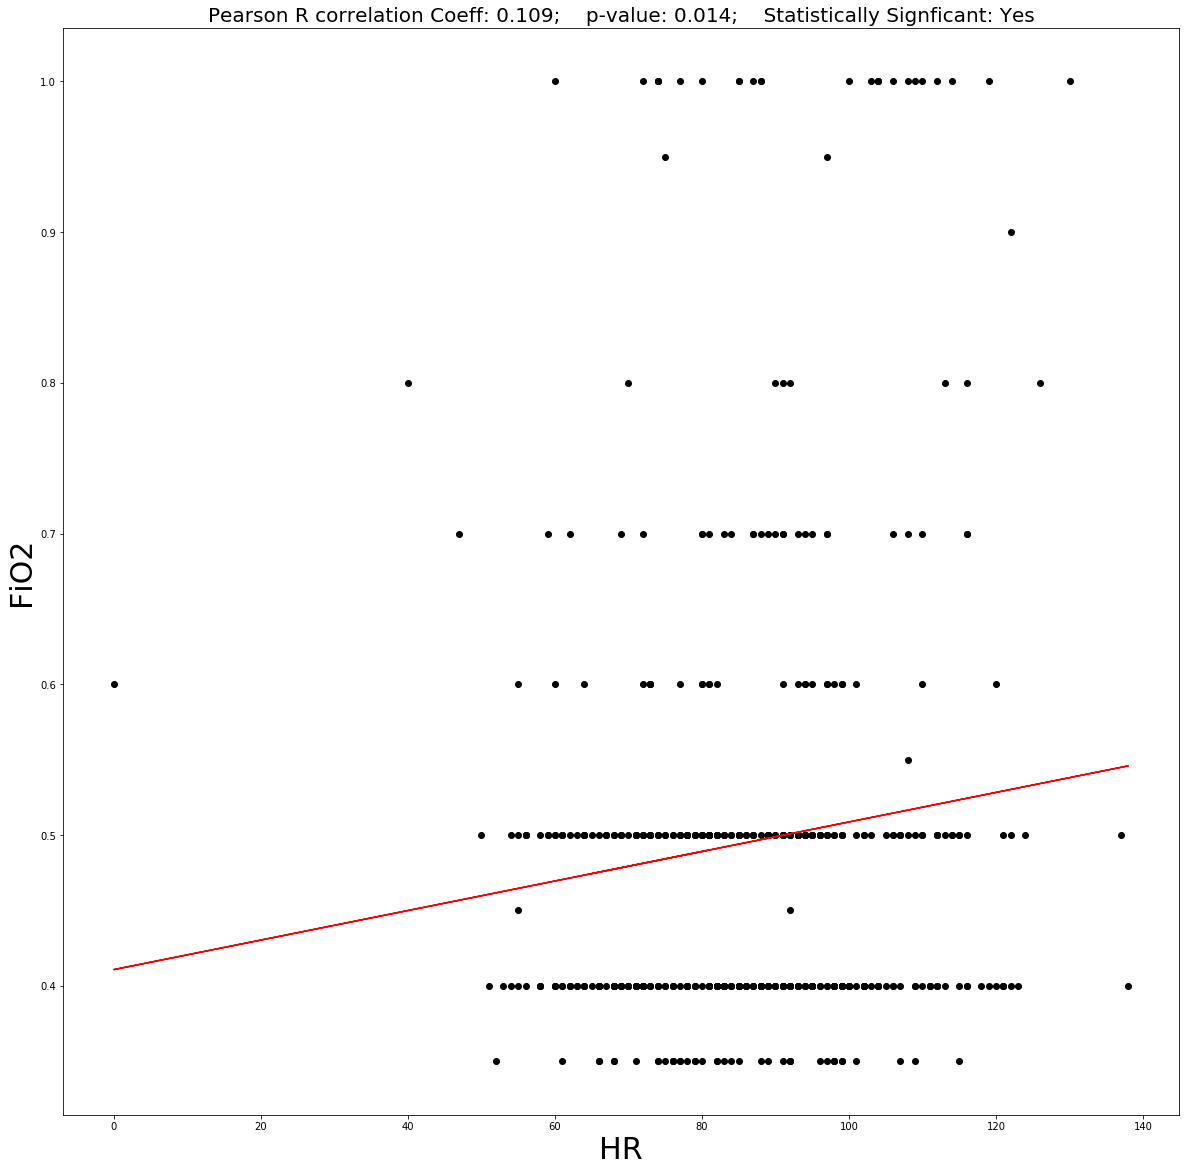

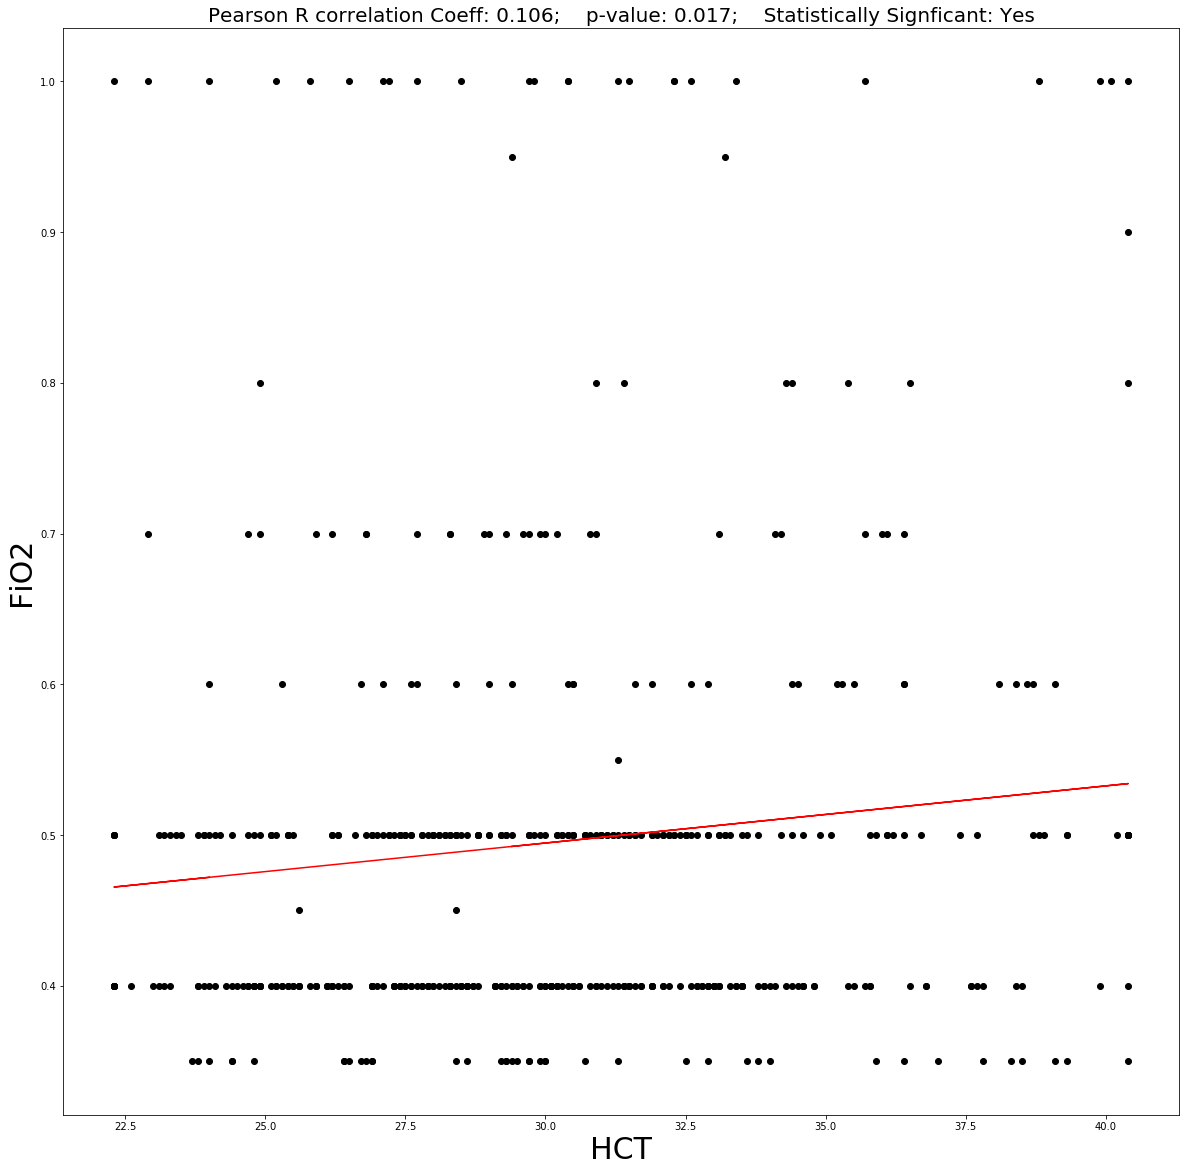

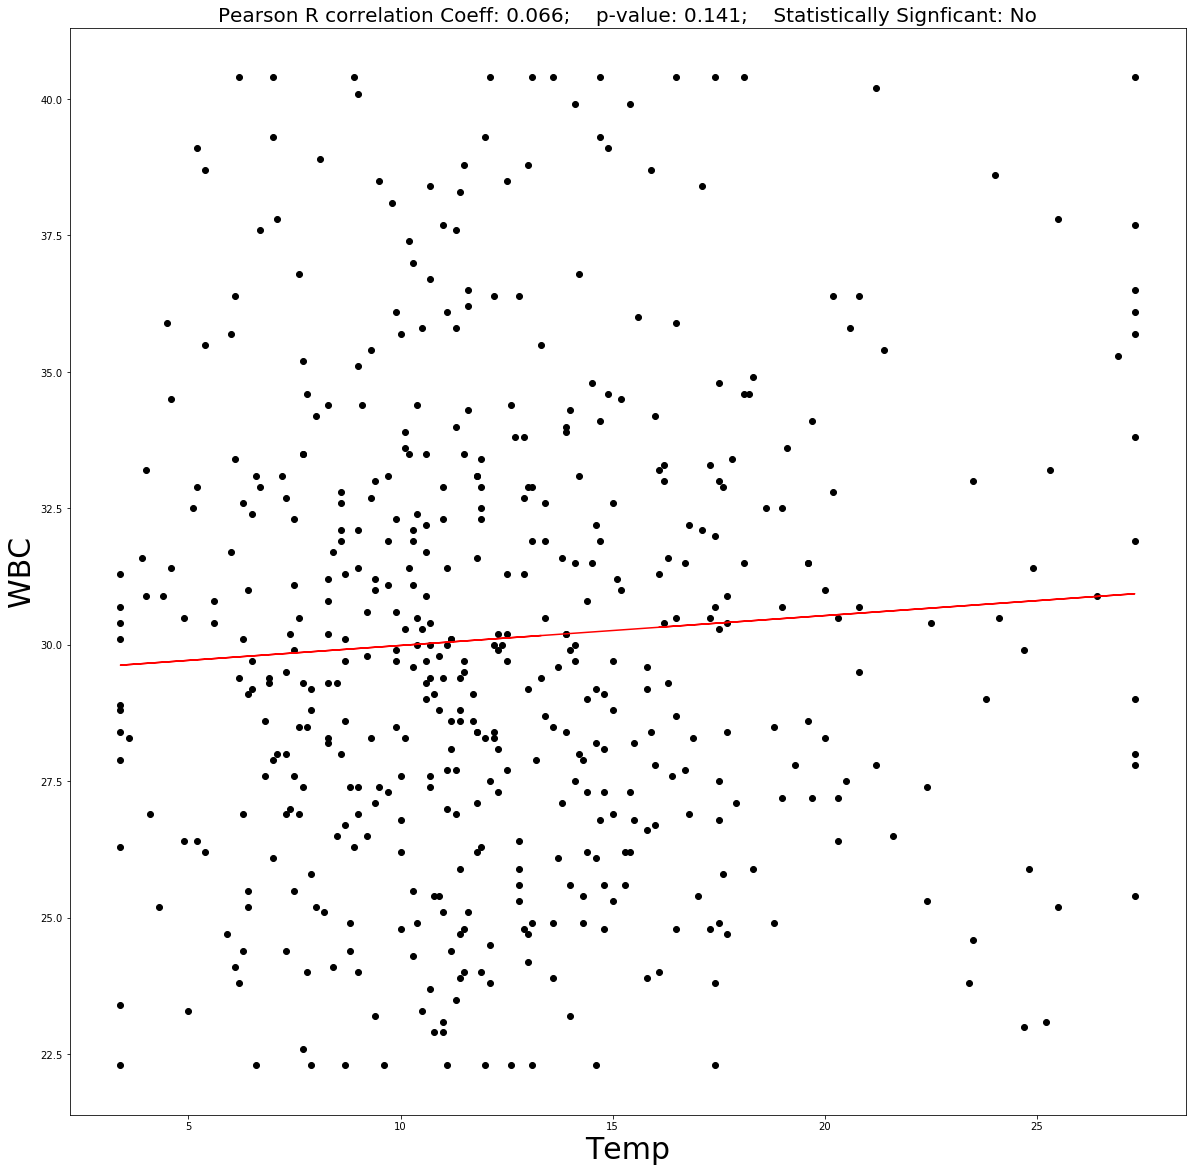

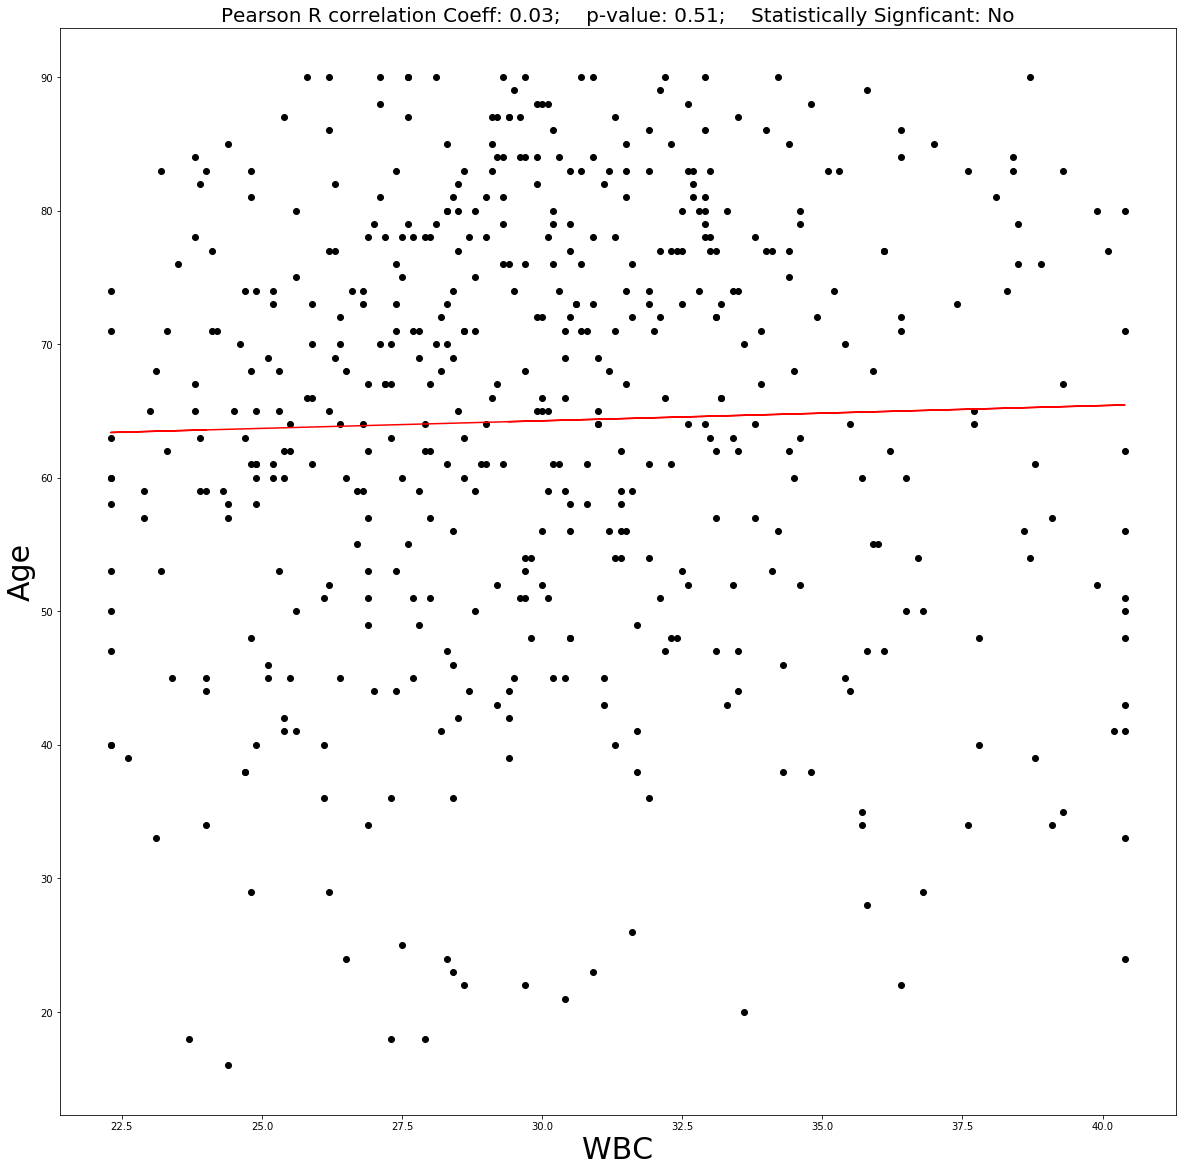

In [29]:
#Winsorized data plots
plot_patients(remove_Outliers(patients))
plt.show()

In [9]:
#PCA
features = ['HR','HCT','FiO2','Glucose','Temp','WBC','GCS','Urine','Age','Gender','Length_of_stay']
# Separating out the features
x = remove_Outliers(patients).loc[:, features].values
# Separating out the target
y = patients.loc[:,['DeathStatus']].values
# Standardizing the features
x = sk.preprocessing.StandardScaler().fit_transform(x)

/app/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
#Show side by side after standardizing
remove_Outliers(patients).loc[:5, features]
pd.DataFrame(x,columns=features).loc[:5, features]


,HR,HCT,FiO2,Glucose,Temp,WBC,GCS,Urine,Age,Gender,Length_of_stay
0,-1.231354,-0.168087,-0.617779,0.387165,-0.168087,-0.168087,0.951599,0.696325,0.702866,0.854461,-0.513896
1,-0.883153,-0.168087,-0.617779,0.311537,-0.168087,-0.168087,-1.656950,-0.553118,-1.215895,-1.170328,0.166679
2,0.335549,1.241109,-0.617779,0.563630,1.241109,1.241109,-0.874386,-0.384275,-0.016669,0.854461,-0.637637
3,-1.637588,0.663570,-0.617779,-0.369115,0.663570,0.663570,-0.613531,-0.519350,0.822789,-1.170328,-0.637637
4,-0.476919,-0.399103,0.031149,-0.419534,-0.399103,-0.399103,0.951599,0.426175,0.582943,0.854461,-0.513896
5,0.509650,-0.630119,-0.617779,0.185490,-0.630119,-0.630119,0.951599,-0.114125,0.403060,-1.170328,-0.575766


In [11]:
#Run PCA
pca = sk.decomposition.PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11'])


In [12]:
#Concatenate output or response column to the prinicipal components dataframe
finalDf = pd.concat([principalDf, patients[['DeathStatus']]], axis = 1)
finalDf.loc[finalDf.DeathStatus==0,'DeathStatus'] ='Alive'
finalDf.loc[finalDf.DeathStatus==1,'DeathStatus'] ='Dead'


/app/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


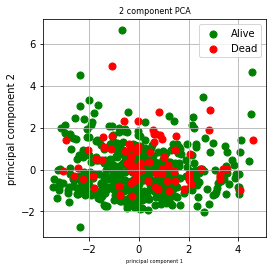

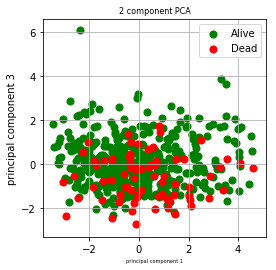

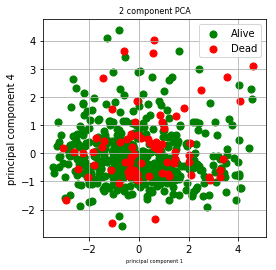

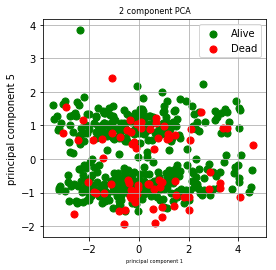

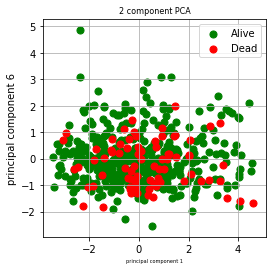

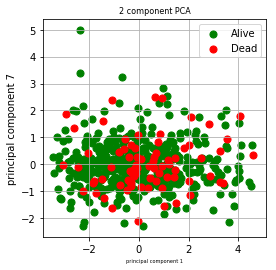

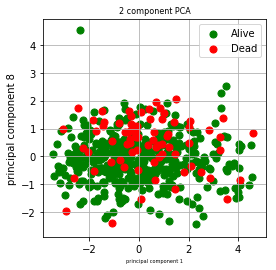

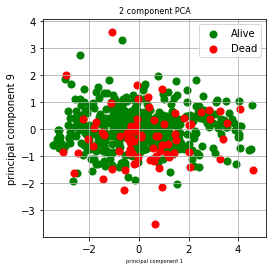

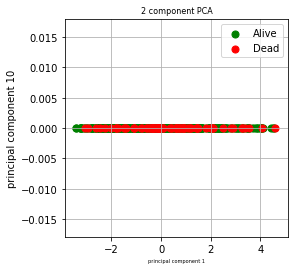

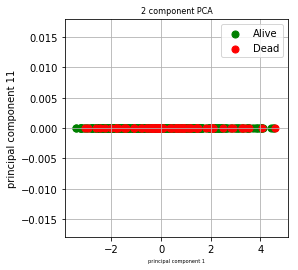

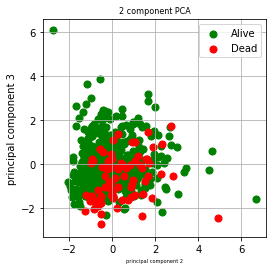

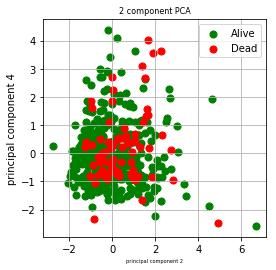

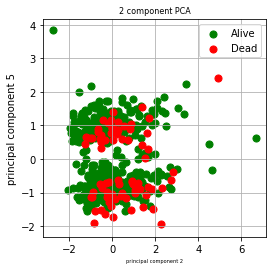

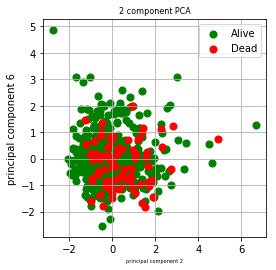

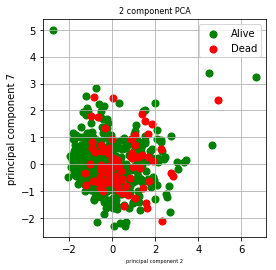

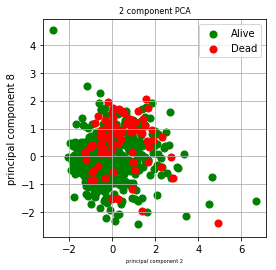

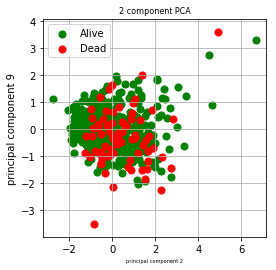

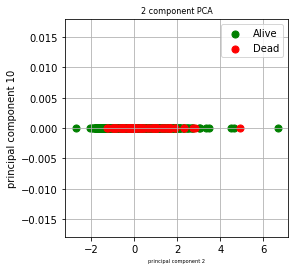

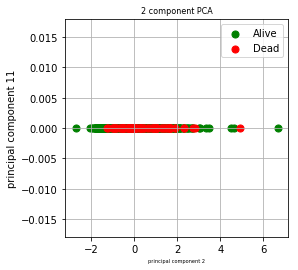

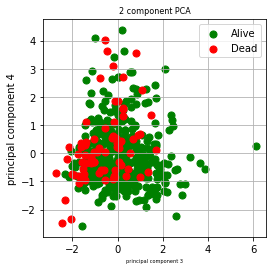

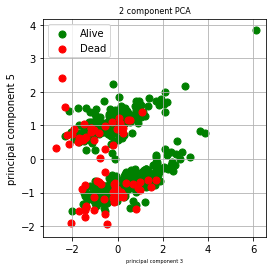

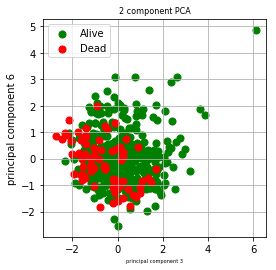

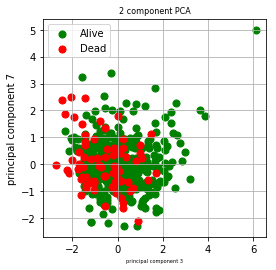

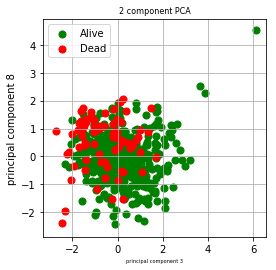

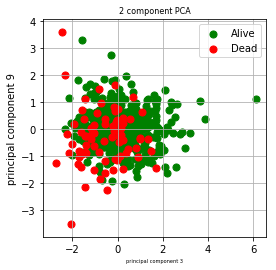

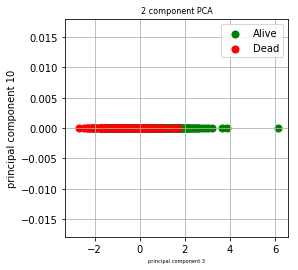

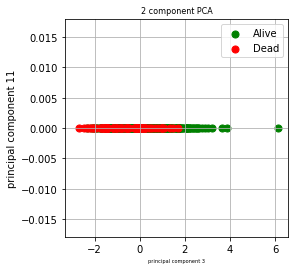

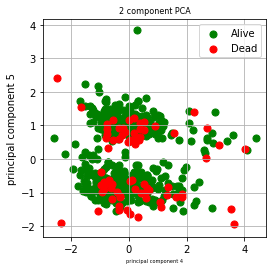

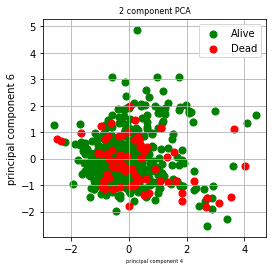

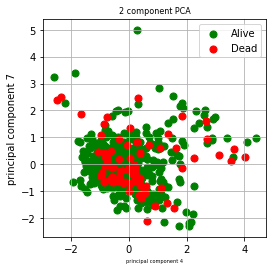

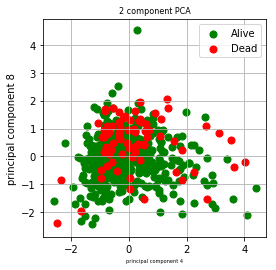

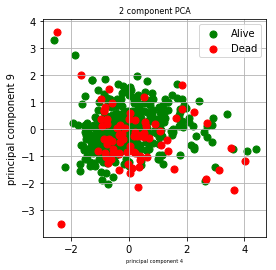

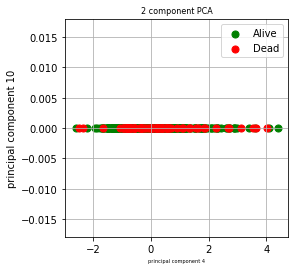

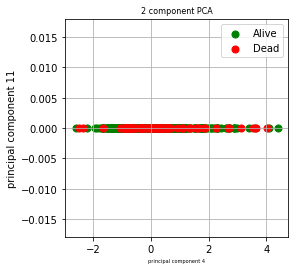

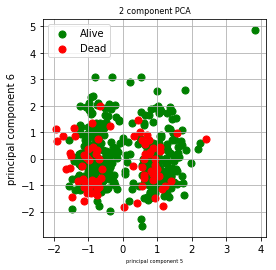

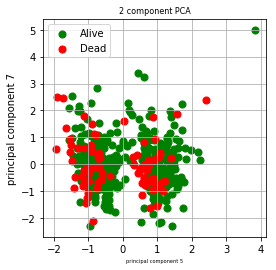

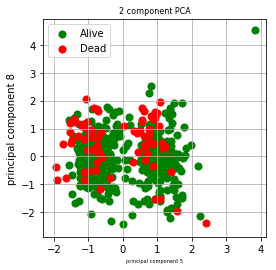

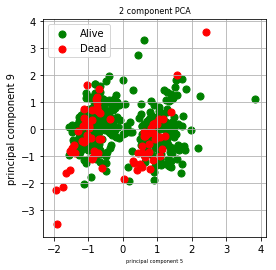

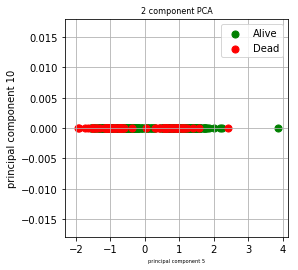

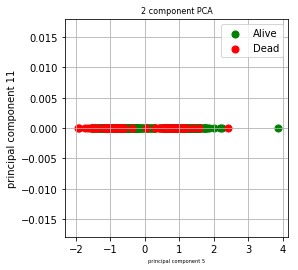

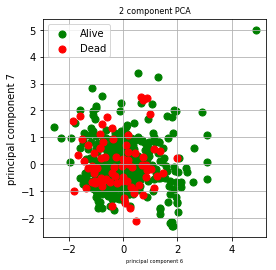

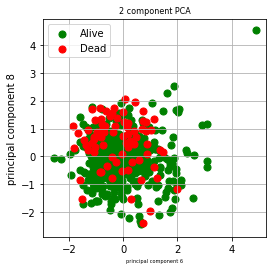

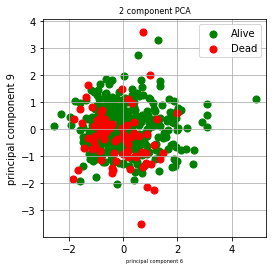

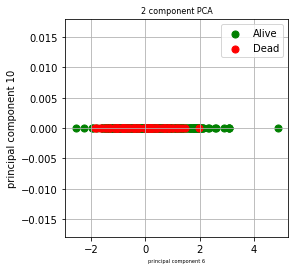

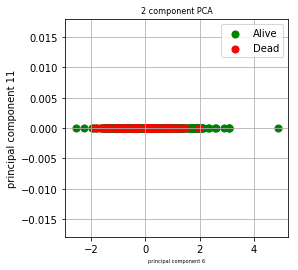

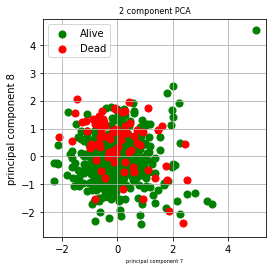

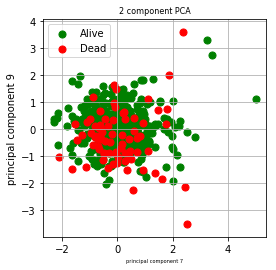

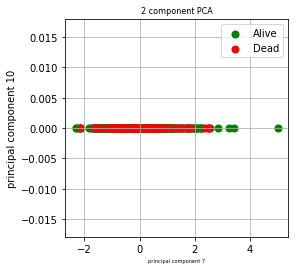

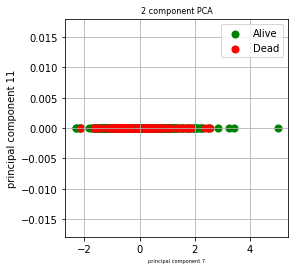

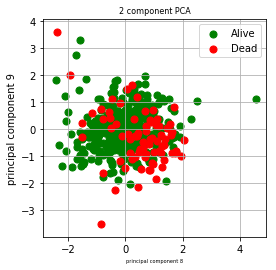

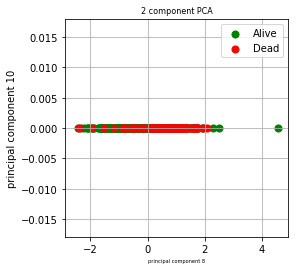

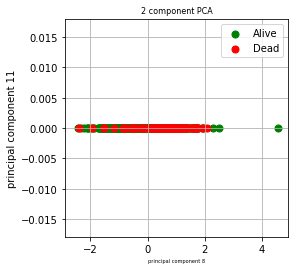

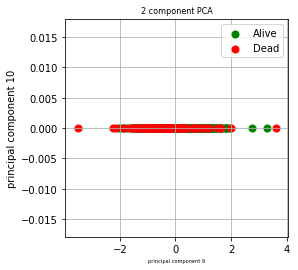

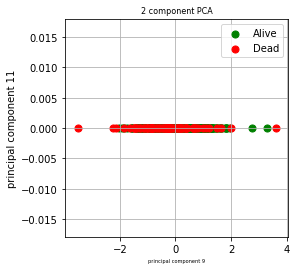

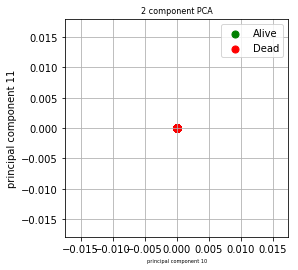

In [21]:
#Plot Components against each other and review the data points for alive and dead patients
components= ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11']
for i in np.arange(len(components)):
    for j in np.arange(i+1,len(components)):
        if(i==j):
            break
        else:       
            fig = plt.figure(figsize = (4,4))
            ax = fig.add_subplot(1,1,1)
            ax.set_xlabel(components[i], fontsize = 5)
            ax.set_ylabel(components[j], fontsize = 10)
            ax.set_title('2 component PCA', fontsize = 8)
            targets = [ 'Alive','Dead']
            colors = ['g', 'r']
            for target, color in zip(targets,colors):
                indicesToKeep = finalDf.index[finalDf.DeathStatus==target]
                ax.scatter(finalDf.loc[indicesToKeep, components[i]]
                           , finalDf.loc[ indicesToKeep, components[j]]
                           , c = color
                           , s = 50)
            ax.legend(targets)
            ax.grid()
plt.show()



In [14]:
#Get the correlations between the components
compsVariances = pd.DataFrame(pca.get_covariance(),index=components,columns=components)
compsVariances.to_excel('covariance_matrix.xlsx',index=True)

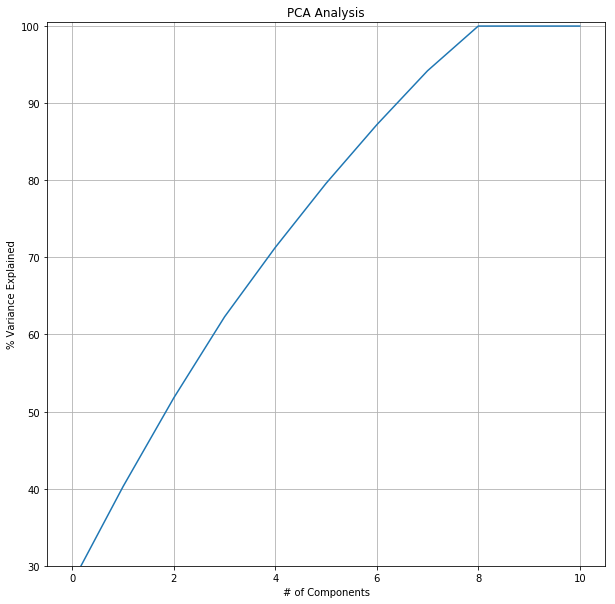

In [15]:
# Get Eignevalues in the descending order and plot cumutively
pca.explained_variance_ratio_
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(len(components)),np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Components')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.grid()
plt.style.context('seaborn-whitegrid')
plt.show()